This code explains how to generate independent variables that tend to have a bimode or multimode distribution and a high correlation between features with three classes.

# Import Library

In [1]:
import pandas as pd
import numpy as np
from numpy.random import normal
from numpy import hstack
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

# Generate independent variables that tend to have a bimode or multimode distribution and a high correlation between features.

1. **One of the ways to generate an independent variable with a bimode or multimode distribution is by combining two or more samples of the normal distribution.**

- To generate a normal random variable, we can use the normal() function, where loc is the mean, scale is the standard deviation, and size is the number of random data that will be generated.
- Then we can combine two or more samples with a normal random variable with the hstack() function. Finally, you can check the distribution of the samples that have been combined using a histogram.

2. **We can set a correlation between two independent variables**. For example, if we have X1 as an independent variable, then we will generate X2 as another independent variable with a correlation  equal to 0.95 (rho = 0.95), so random variable X2 can be obtained from this formula:


- $ rho = 0.95 $
- $ X2 = (rho * X1) + (sqrt(1 - rho*rho)*normal(loc=X1.mean(), scale=X1.std(),  
  size=len(X1)) $


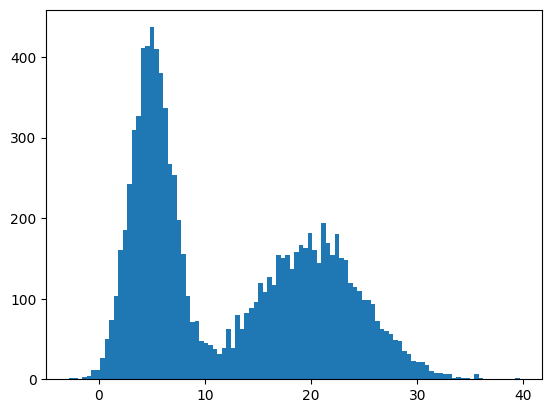

In [3]:
# generate normal random variable
sample1 = normal(loc=20, scale=5, size=5000)
sample2 = normal(loc=5, scale=2, size=5000)
# combining samples
X1 = hstack((sample1, sample2))
# plot the histogram
plt.hist(X1, bins=100)
plt.show()

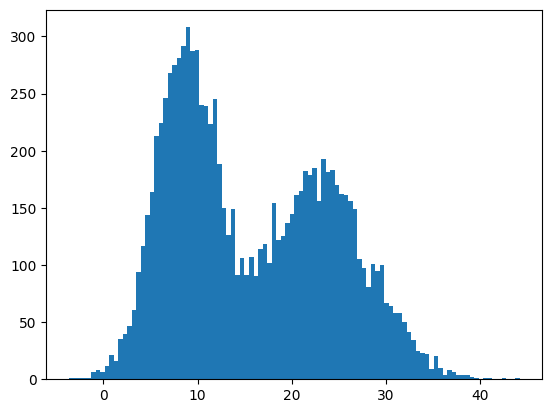

In [4]:
# set correlaion between X1 and X2 equal to 0.95
rho = 0.95
# generate random variable X2
X2 = (rho * X1) + (math.sqrt(1 - rho*rho)*normal(loc=X1.mean(), scale=X1.std(), size=len(X1)))
# plot the histogram
plt.hist(X2, bins=100)
plt.show()

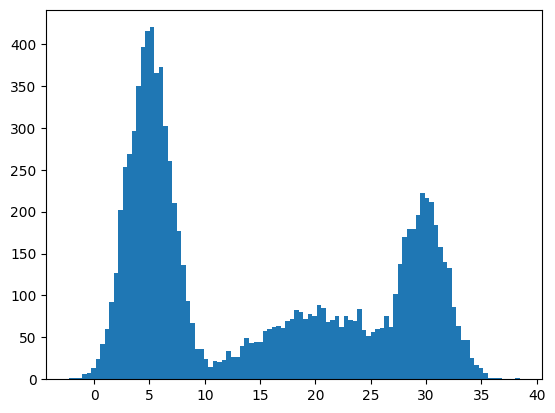

In [5]:
# generate normal random variables
sample1 = normal(loc=5, scale=2, size=5000)
sample2 = normal(loc=30, scale=2, size=2500)
sample3 = normal(loc=20, scale=5, size=2500)
# combining samples
X3 = hstack((sample1, sample2, sample3))
# plot the histogram
plt.hist(X3, bins=100)
plt.show()

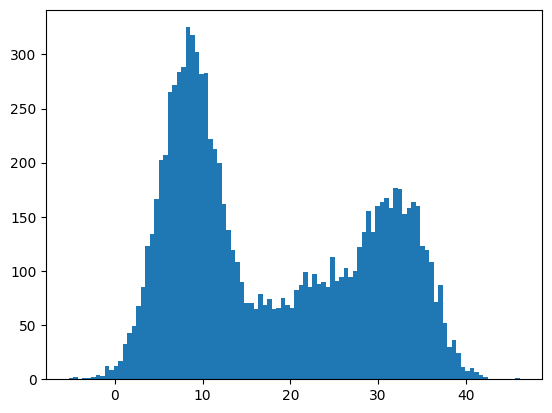

In [6]:
# set correlation between X3 and X4 equal to 0.97
rho3 = 0.97
# generate random variable X4
X4 = (rho3 * X3) + (math.sqrt(1 - rho3*rho3)*normal(loc=X3.mean(), scale=X3.std(), size=len(X3)))
# plot the histogram
plt.hist(X4, bins=100)
plt.show()

In [7]:
# Dataframe of independent variables
data_X = pd.DataFrame(data=[X1,X2,X3,X4])
data_X

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,22.483571,19.308678,23.238443,27.615149,18.829233,18.829315,27.896064,23.837174,17.652628,22.712800,...,7.867250,5.382901,6.324338,2.002729,7.388429,7.602204,1.003310,3.589367,5.991531,6.288777
1,23.477889,21.443530,24.408522,30.429445,24.943369,19.762745,33.040010,24.492231,18.443307,27.636259,...,14.623423,7.784573,12.252114,8.182523,13.430807,12.147337,8.483029,8.310206,14.106679,5.614839
2,5.696572,5.566647,3.126960,6.159168,2.019835,3.691631,1.001824,8.117253,4.536901,9.333768,...,18.907309,29.124446,24.383534,13.839958,13.693959,17.113561,27.223020,17.493163,10.538216,18.855579
3,3.845718,6.204178,5.093787,10.012494,8.344682,9.080458,1.442545,10.512329,8.242158,11.986285,...,26.886580,34.553816,27.713877,15.456863,14.297431,23.241910,30.754097,22.259554,16.045061,22.881784


In [8]:
# Dataframe of independent variables
data_independent_variable = data_X.T

In [9]:
data_independent_variable

,0,1,2,3
0,22.483571,23.477889,5.696572,3.845718
1,19.308678,21.443530,5.566647,6.204178
2,23.238443,24.408522,3.126960,5.093787
3,27.615149,30.429445,6.159168,10.012494
4,18.829233,24.943369,2.019835,8.344682
...,...,...,...,...
9995,7.602204,12.147337,17.113561,23.241910
9996,1.003310,8.483029,27.223020,30.754097
9997,3.589367,8.310206,17.493163,22.259554
9998,5.991531,14.106679,10.538216,16.045061


In [10]:
data_independent_variable.rename(columns={0:'X1', 1:'X2', 2:'X3', 3:'X4'}, inplace=True)
data_independent_variable

,X1,X2,X3,X4
0,22.483571,23.477889,5.696572,3.845718
1,19.308678,21.443530,5.566647,6.204178
2,23.238443,24.408522,3.126960,5.093787
3,27.615149,30.429445,6.159168,10.012494
4,18.829233,24.943369,2.019835,8.344682
...,...,...,...,...
9995,7.602204,12.147337,17.113561,23.241910
9996,1.003310,8.483029,27.223020,30.754097
9997,3.589367,8.310206,17.493163,22.259554
9998,5.991531,14.106679,10.538216,16.045061


In [11]:
num = ["X1", "X2","X3","X4"]

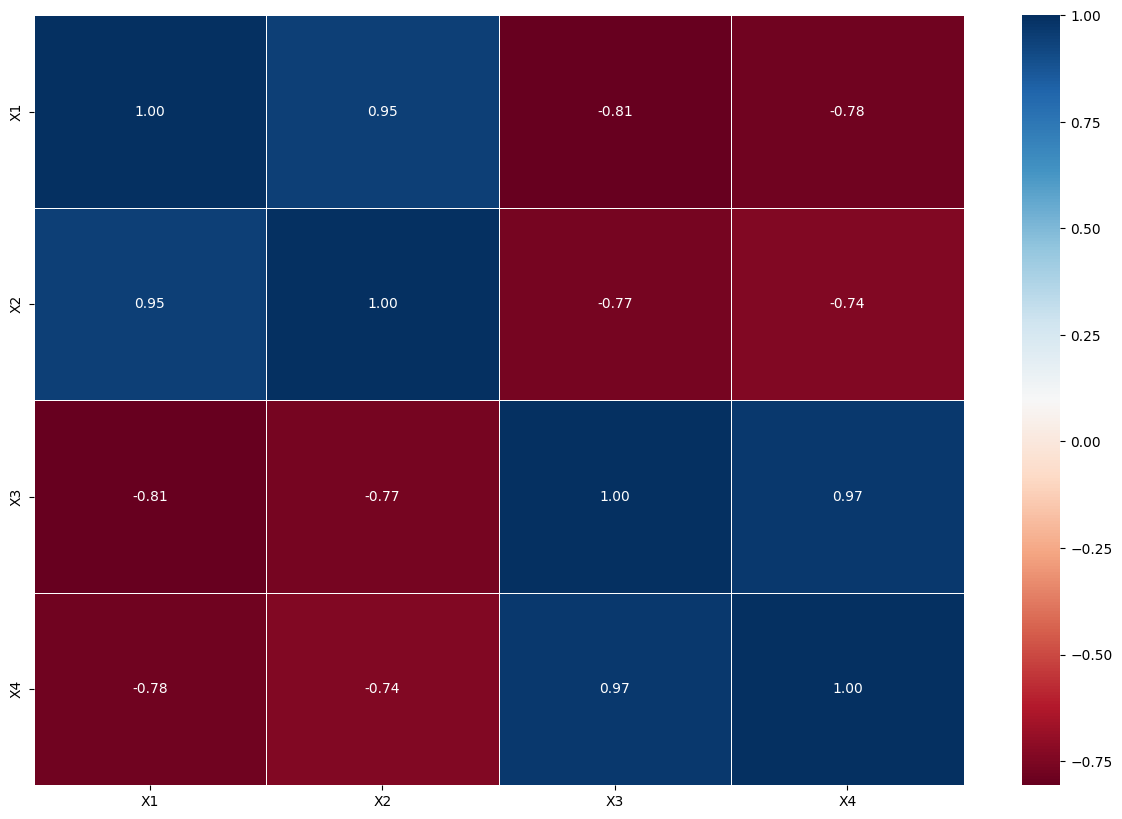

In [12]:
# check the correlation
corr_matrix = data_independent_variable[num].corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 cmap='RdBu',
                 fmt=".2f")

Finally, we can generate independent variables that tend to have a bimode or multimode distribution and a high correlation between features. Then, based on these independent variables, we can set the dependent variable. **In this case, let's try applying the idea of multinominal logistic regression to this situation.**

# Generate the dependent variable using idea of multinominal logistic regression
In this case, we will generate three classes, namely A, B, and C.
1. Set the baseline class, in this case C
2. Setting the parameter $beta (b) $, in this case $ beta_{0A}$, $ beta_{0B}$, $ beta_{1A}$, $ beta_{1B}$, $ beta_{2A}$, $ beta_{2B}$, $ beta_{3A}$, $ beta_{3B}$, $ beta_{4A}$, and $ beta_{4B}$ (because there are 4 independent variables and 3 classes).
3. Calculate the probability using this formula:

  $ denominator = 1+ exp(b_{0A} +b_{1A}*X1+b_{2A}*X2+b_{3A}*X3+b_{4A}*X4)+ exp(b_{0B}+b_{1B}*X1+b_{2B}*X2+b_{3B}*X3+b_{4B}*X4)$

- The probability of outcome A can be written as follows.
  $ P(Y=A) = exp(b_{0A}+b_{1A}*X1+b_{2A}*X2+b_{3A}*X3+b_{4A}*X4)/denominator$

- The probability of outcome B can be written as follows.
 $ P(Y=B) = exp(b_{0B}+b_{1B}*X1+b_{2B}*X2+b_{3B}*X3+b_{4B}*X4)/denominator$

- The probability of outcome C can be written as follows.

  $ P(Y=C) = 1/denominator $
4. Generate the dependent variable based on the probability of each class using np.random.choice() function.

In [13]:
# set the baseline class, in this case C
# setting parameter beta
b0A = 2.2 #True value for the intercepts
b0B = 1.5
b1A = -1.5 #True value for the slopes
b1B = -1.8
b2A = 1.5
b2B = 1.3
b3A = 0.75
b3B = -1.5
b4A = -1
b4B = 1

In [14]:
denominator = 1+ np.exp(b0A+b1A*X1+b2A*X2+b3A*X3+b4A*X4)+ np.exp(b0B+b1B*X1+b2B*X2+b3B*X3+b4B*X4)

In [15]:
# Calculate the probability
pA = np.exp(b0A+b1A*X1+b2A*X2+b3A*X3+b4A*X4)/denominator
pB = np.exp(b0B+b1B*X1+b2B*X2+b3B*X3+b4B*X4)/denominator
pC = 1/denominator

In [16]:
prob = pd.DataFrame()
prob['pA'] = pA
prob['pB'] = pB
prob['pC'] = pC
prob

,pA,pB,pC
0,0.983987,3.120638e-08,0.016013
1,0.966835,1.788341e-05,0.033147
2,0.769640,6.358344e-05,0.230297
3,0.736518,1.000944e-04,0.263382
4,0.307457,6.892661e-01,0.003277
...,...,...,...
9995,0.055392,7.224295e-01,0.222178
9996,0.882699,7.684446e-02,0.040457
9997,0.134119,7.494681e-01,0.116413
9998,0.044769,9.551428e-01,0.000088


In [17]:
# The dependent variable
simulated_data = pd.DataFrame(columns=['Y'])

In [18]:
simulated_data

,Y


In [19]:
# generate the dependent variable based on the probability of each class.
reps=10000
for i in range(reps):
  # Create Y based on the probabilities
    Y= np.random.choice(['A', 'B', 'C'], size=1, replace=True, p=[pA[i], pB[i], pC[i]])

    # Append the simulated data to the DataFrame
    simulated_data = pd.concat([simulated_data, pd.DataFrame({'Y': Y})], ignore_index=True)

In [20]:
simulated_data.value_counts()

Y
A    4675
C    4252
B    1073
dtype: int64

In [21]:
sim_data = data_independent_variable
sim_data['Y'] = simulated_data
sim_data

,X1,X2,X3,X4,Y
0,22.483571,23.477889,5.696572,3.845718,A
1,19.308678,21.443530,5.566647,6.204178,A
2,23.238443,24.408522,3.126960,5.093787,A
3,27.615149,30.429445,6.159168,10.012494,A
4,18.829233,24.943369,2.019835,8.344682,B
...,...,...,...,...,...
9995,7.602204,12.147337,17.113561,23.241910,C
9996,1.003310,8.483029,27.223020,30.754097,A
9997,3.589367,8.310206,17.493163,22.259554,B
9998,5.991531,14.106679,10.538216,16.045061,B


Finally, we can generate a data simulation with three classes and four independent variables using the multinominal logistic regression idea.

In [22]:
#eksport simulation multiclass data
sim_data.to_csv("Simulation_Multiclass_Data.csv", index=False)